In [1]:
from sklearn import datasets
faces=datasets.fetch_olivetti_faces()
X=faces.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 64, 64)


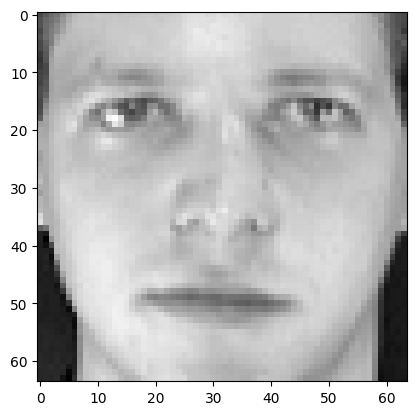

(400, 4096)


In [2]:
import matplotlib.pyplot as plt
print(X.shape)
plt.imshow(X[0],cmap='gray')
plt.show()

X= X.reshape(X.shape[0],-1)
print(X.shape)

In [3]:
import numpy as np

U,S,Vh= np.linalg.svd(X)
print(U.shape,S.shape,Vh.shape)

(400, 400) (400,) (4096, 4096)


In [4]:
Xe= U.dot(np.diag(S).dot(Vh[:S.shape[0]]))
print(Xe.shape)

(400, 4096)


In [5]:
error=np.linalg.norm(X-Xe, ord='fro')
print(error)

0.00026315142


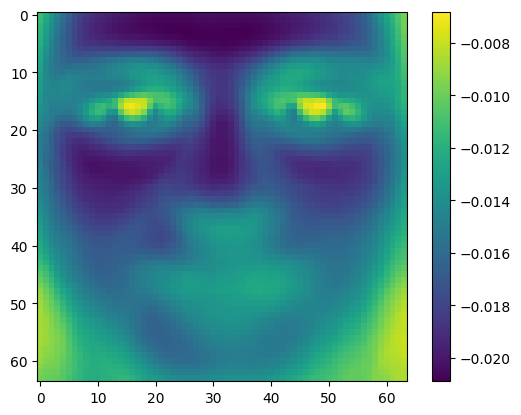

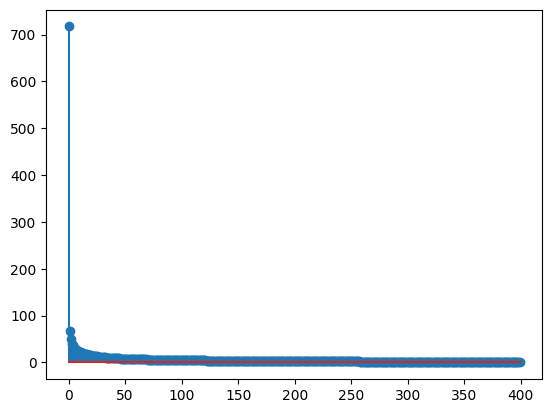

In [6]:
plt.imshow(Vh[0].reshape(64,64))
plt.colorbar()
plt.show()
plt.stem(S)
plt.show()

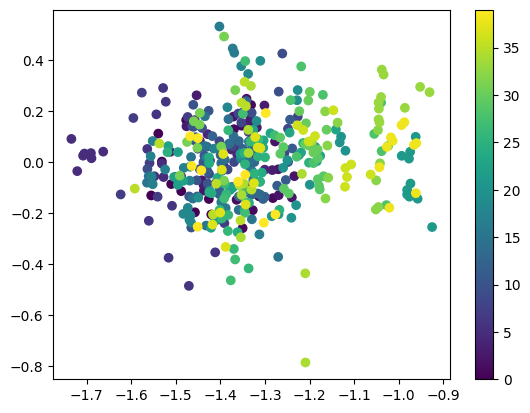

In [7]:
A= U.dot(np.diag(S**0.5))
plt.scatter(A[:,0],A[:,30], c=faces.target)
plt.colorbar()
plt.show()

In [8]:
Vhm=Vh[:S.shape[0]]
iXTX=Vhm.T.dot(np.diag(S**2)).dot(Vhm)
iXTX.shape

(4096, 4096)

**Clase 28/02/2024**

In [1]:
A= int(input("Ingrese la amplitud: "))
N = int(input("Ingrese la cantidad de muestras: "))

Ingrese la amplitud:  8
Ingrese la cantidad de muestras:  100


In [2]:
import numpy as np
f= 1/N #frecuencia de muestreo
Vn= np.arange(0,N,1) #crea un arreglo que inicia en 0 hasta N-1, Con un paso de 1.
s=1 #varianza
x=A*np.sin(2*np.pi*1/N*Vn) #crea una señal sinusoidal.
y= x+ np.random.normal(0,s,N)#añade ruido gaussiano (Con media 0, varianza 1 y numero de muestra igaul a N) a la señal x 

$x = [A*sen(2\pi \frac{1}{N}*0), A*sen(2\pi \frac{1}{N}*1), A*sen(2\pi \frac{1}{N}*2), ..., A*sen(2\pi \frac{1}{N}*(N-1))]$

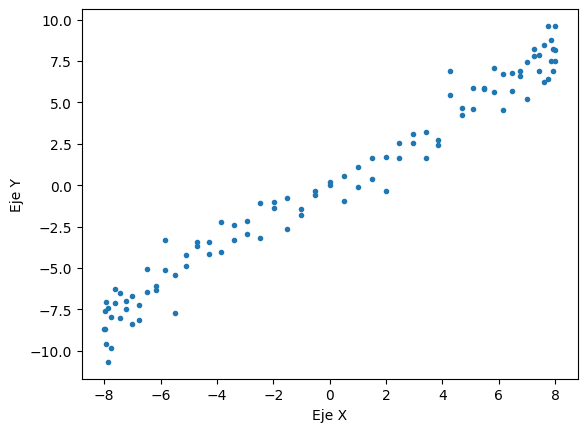

In [3]:
import matplotlib.pyplot as plt
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.plot(x, y, '.')

In [4]:
arr = np.arange(0,N,1)
sin = A*np.sin(2*np.pi*1/(N)*arr) 
z= sin + np.random.normal(0,1,(N)) #agregamos el ruido a el seno 

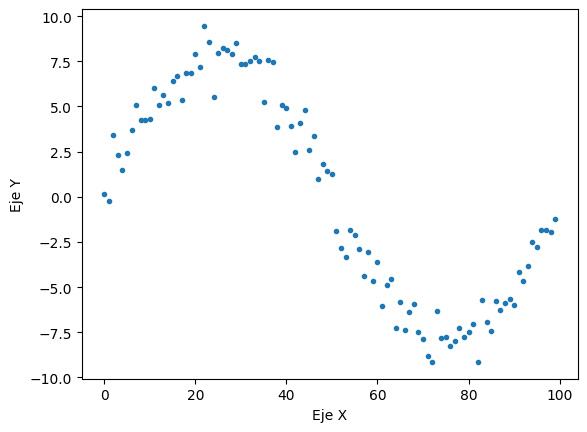

In [6]:
#Gráfica del seno ruidoso
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.plot(arr, z, '.')
plt.show()

# Ejercicio regularización

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
A= int(input("Ingrese la amplitud: "))
N = int(input("Ingrese la cantidad de muestras: ")) #preferiblemente en un rango de 50-100
l = 1e-5
arr = np.arange(0,N,1)
y=A*np.sin(2*np.pi*1/N*arr) #crea una señal sinusoidal.

Ingrese la amplitud:  8
Ingrese la cantidad de muestras:  100


**Función Polinomial**


Con ayuda de la funcion poly_phy hacemos la evaluacion de las muestras "arr" en la funcion polynomial de nuestro interes por defecto se crea la funcion con el uso de un polinomio de grado 3 

In [9]:
def poly_phi(X, Q=3):
        
        phi = []
        for i in range(Q+1):
            phi.append(X**i)      
        return np.array(phi).T

**Ejemplo de uso de def poly_phi**

In [10]:
phi = poly_phi(arr) #llamamos la función e ingresamos el parametro a (array)
phi.shape #verificamos el tamaño de la matriz

(100, 4)

ahora calculamos los pesos **W**


In [11]:
import matplotlib.pyplot as plt

def calculate_weights(phi, y, l, N):
    """
    Calcula los pesos de una regresión lineal regularizada.

    Args:
    - phi: matriz de características (diseño), donde cada fila representa una muestra y cada columna representa una característica.
    - y: vector de valores objetivo.
    - l: parámetro de regularización lambda.
    - N: número de muestras.

    Returns:
    - w: vector de pesos calculado.
    
    ..\math
    """

    tmul = phi.T @ phi  # El producto de phi
    lni= (l*N*np.eye(len(tmul)) )# La suma de lambda por N por la matriz identidad (regularización)
    w =np.linalg.inv(tmul+lni)@(phi.T)@(y)

    return w


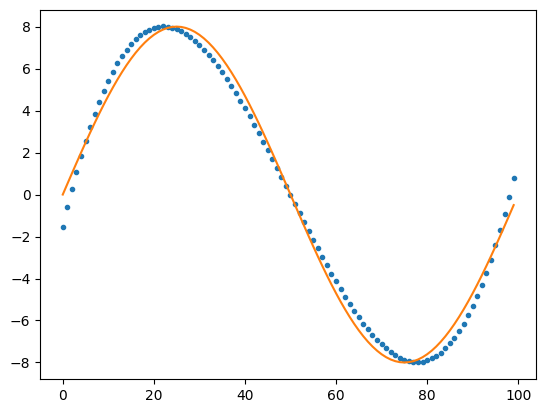

In [12]:
weights=calculate_weights(phi, y, l, N)
weights.shape
ye=(phi@weights)#la ye (estimada) es igual a phi por los pesos
plt.plot(ye,'.') #si reconstruye nuestra y :)
plt.plot(y)
plt.show()

# Función Gaussiana

In [16]:
def gauss_phi(X, Q=N,  sigma=1): #Poniendo cada media de la gaussiana como cada punto N.
    phi_gauss = []
    for i in range(Q+1):
        gaussian = np.exp(-(X - i)**2 / (2 * sigma**2))  # Calcula la función gaussiana
        phi_gauss.append(gaussian)
    phi_gauss = np.array(phi_gauss)
    return phi_gauss.T

In [17]:
gauss=gauss_phi(arr)
gauss.shape

(100, 101)

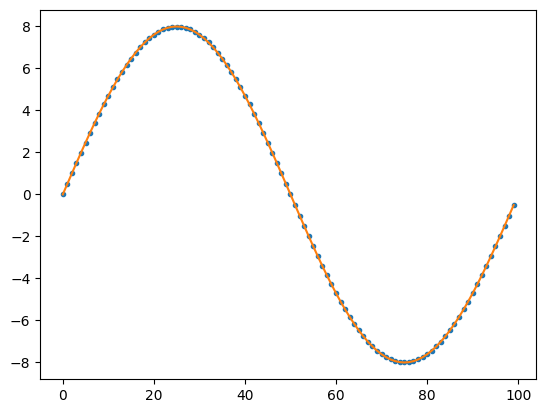

In [18]:
weights_gauss = calculate_weights(gauss, y, l, N)
ye_gauss=(gauss@weights_gauss)#la ye (estimada) es igual a phi por los pesos
plt.plot(ye_gauss,'.') #si reconstruye nuestra y :)
plt.plot(y)
plt.show()